In [ ]:
import pandas as pd

file_path = r"D:\documents\ecom_data.csv"
data = pd.read_csv(file_path)

print(data.head())


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

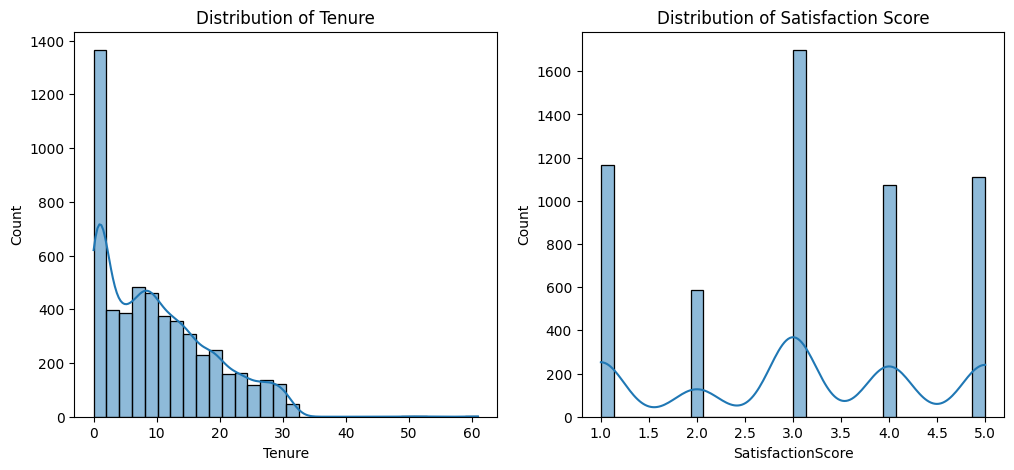

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')

plt.subplot(1, 2, 2)
sns.histplot(data['SatisfactionScore'], bins=30, kde=True)
plt.title('Distribution of Satisfaction Score')

plt.show()

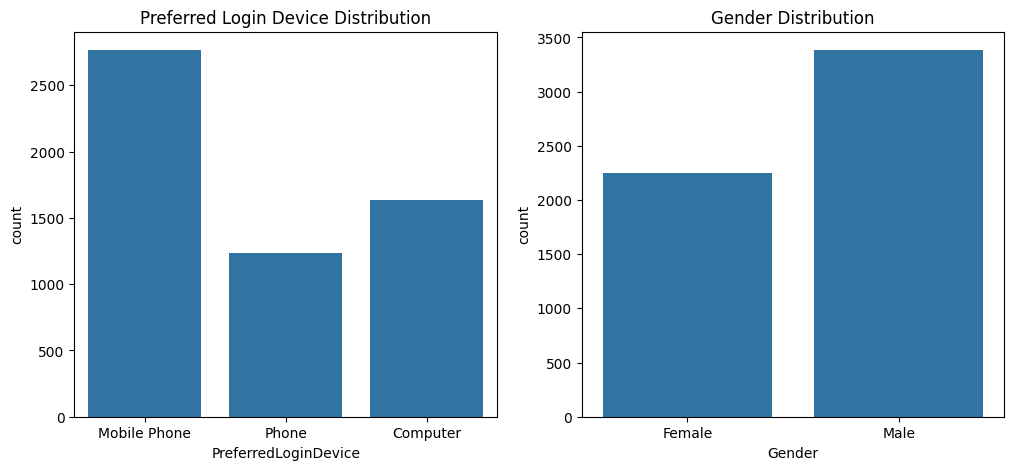

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='PreferredLoginDevice')
plt.title('Preferred Login Device Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

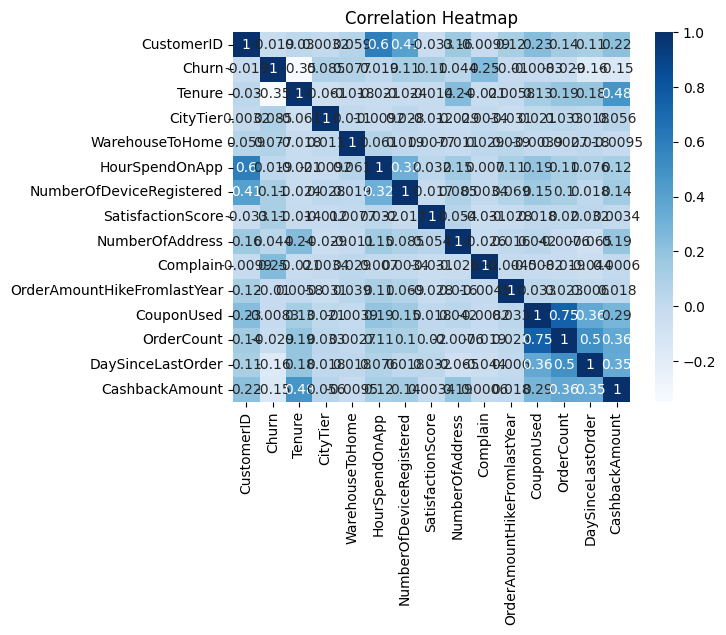

In [ ]:
correlation = data.select_dtypes(include='number').corr()

sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Check for null values
print(data.isnull().sum())
X = data.drop('CustomerID', axis=1)
y = data['OrderCount']

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
import torch
import torch.nn as nn

class FullyConnected(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, 64)  # Adjusted input layer
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(64, 16)
        self.drop = nn.Dropout(0.2)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(16, 1)  # Output layer changed to 1 neuron for binary classification
        self.act3 = nn.Sigmoid()  # Sigmoid activation for binary output

    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        x = self.act3(x)  # Sigmoid activation
        return x

# Example usage:
input_size = 19  # Adjust based on your dataset's feature count
model = FullyConnected(input_size)
print(model)


FullyConnected(
  (l1): Linear(in_features=19, out_features=64, bias=True)
  (act1): ReLU()
  (l2): Linear(in_features=64, out_features=16, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (act2): ReLU()
  (l3): Linear(in_features=16, out_features=1, bias=True)
  (act3): Sigmoid()
)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def fit(model, train_loader):
    epochs = 400
    loss_arr = []
    loss_fn = nn.CrossEntropyLoss()  # Suitable for multi-class classification
    optimizer = optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        epoch_loss = 0
        for X_batch, y_batch in train_loader:  # Batch-wise training
            optimizer.zero_grad()  # Reset gradients
            y_pred = model(X_batch)  # Forward pass
            loss = loss_fn(y_pred, y_batch)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            epoch_loss += loss.item()

        loss_arr.append(epoch_loss / len(train_loader))  # Average loss per epoch

        if epoch % 50 == 0:  # Print every 50 epochs
            print(f"Epoch {epoch}, Loss: {epoch_loss / len(train_loader):.4f}")

    plt.plot(loss_arr)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(newytest.cpu(), y_test))
print("Confusion Matrix:\n", confusion_matrix(newytest.cpu(), y_test))

Accuracy: 0.8357015985790408
Confusion Matrix:
 [[941 185]
 [  0   0]]


In [ ]:
import torch
import torch.nn as nn

class FullyConnected(nn.Module):
    def __init__(self, input_size=4, output_size=3):
        super().__init__()
        self.l1 = nn.Linear(input_size, 64)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(64, 16)
        self.drop = nn.Dropout(0.2)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(16, output_size)

    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        return x

# Define input and output size based on your dataset
input_size = 4  # Change this based on your dataset's feature count
output_size = 3  # Change this based on the number of classes

model = FullyConnected(input_size, output_size)

# Print model summary
print("Neural Network Model Summary:")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")


Neural Network Model Summary:
FullyConnected(
  (l1): Linear(in_features=4, out_features=64, bias=True)
  (act1): ReLU()
  (l2): Linear(in_features=64, out_features=16, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (act2): ReLU()
  (l3): Linear(in_features=16, out_features=3, bias=True)
)
Total parameters: 1411


In [ ]:
import torch
import torch.nn as nn
from torchinfo import summary

class FullyConnected(nn.Module):
    def __init__(self, input_size=4, output_size=3):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.output(x)
        return x

# Define model
input_size = 4  # Change as per your dataset
output_size = 3  # Change as per your dataset
model = FullyConnected(input_size, output_size)

# Print formatted summary
print("Neural Network Model Summary:")
summary(model, input_size=(1, input_size))


Neural Network Model Summary:


Layer (type:depth-idx)                   Output Shape              Param #
FullyConnected                           [1, 3]                    --
├─Linear: 1-1                            [1, 10]                   50
├─Linear: 1-2                            [1, 10]                   110
├─Linear: 1-3                            [1, 3]                    33
Total params: 193
Trainable params: 193
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00